In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [316]:
df = pd.read_csv("BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...,...
1823,2024-02-26,51730.539063,54938.175781,50931.031250,54522.402344,54522.402344,34074411896
1824,2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031
1825,2024-02-28,57071.097656,63913.132813,56738.425781,62504.789063,62504.789063,83239156760
1826,2024-02-29,62499.183594,63585.644531,60498.730469,61198.382813,61198.382813,65496611844


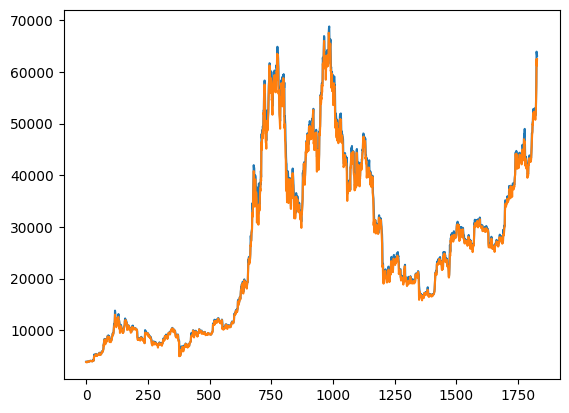

In [317]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

<h1>Tỉ lệ Train Test 7:3

In [318]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [319]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=700,colsample_bytree=0.5, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [320]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.5144722080073834
MSE:  874773.0366544556
RMSE: 935.293021814263
R_Square:  0.9897906653311351


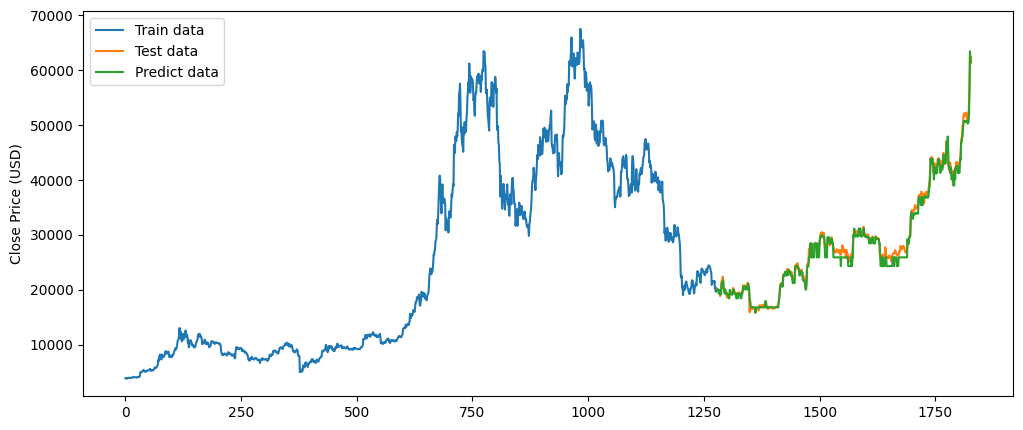

In [322]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [323]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [324]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

x_next_30_day

[array([61530.58], dtype=float32),
 array([60008.117], dtype=float32),
 array([59063.08], dtype=float32),
 array([58020.617], dtype=float32),
 array([56062.4], dtype=float32),
 array([54997.76], dtype=float32),
 array([52084.13], dtype=float32),
 array([50608.09], dtype=float32),
 array([49351.15], dtype=float32),
 array([48430.41], dtype=float32),
 array([46864.504], dtype=float32),
 array([45562.176], dtype=float32),
 array([43666.53], dtype=float32),
 array([42543.082], dtype=float32),
 array([41159.54], dtype=float32),
 array([39687.137], dtype=float32),
 array([38515.023], dtype=float32),
 array([37118.8], dtype=float32),
 array([35437.], dtype=float32),
 array([33884.7], dtype=float32),
 array([33273.934], dtype=float32),
 array([32317.06], dtype=float32),
 array([30809.938], dtype=float32),
 array([29951.736], dtype=float32),
 array([29558.408], dtype=float32),
 array([29219.717], dtype=float32),
 array([28441.082], dtype=float32),
 array([25897.354], dtype=float32),
 array([243

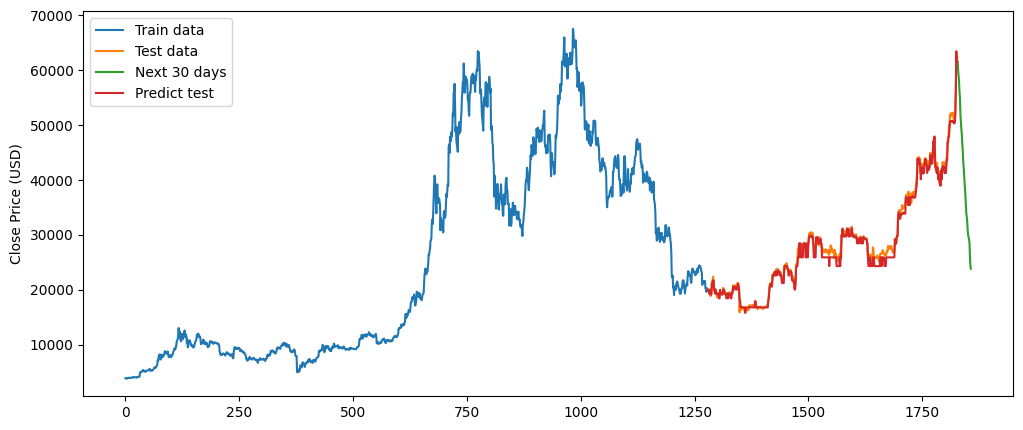

In [325]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict test')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

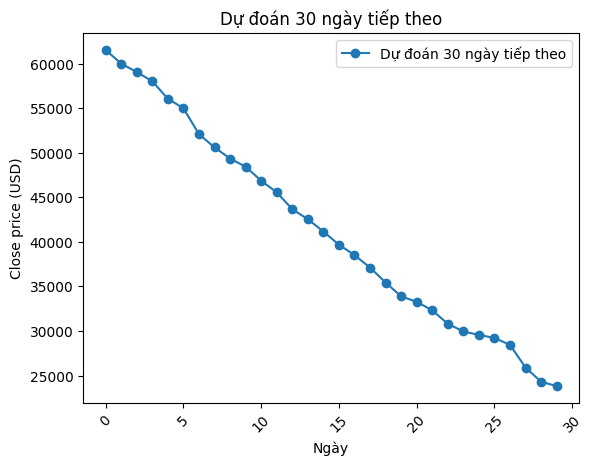

In [326]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [327]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [328]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

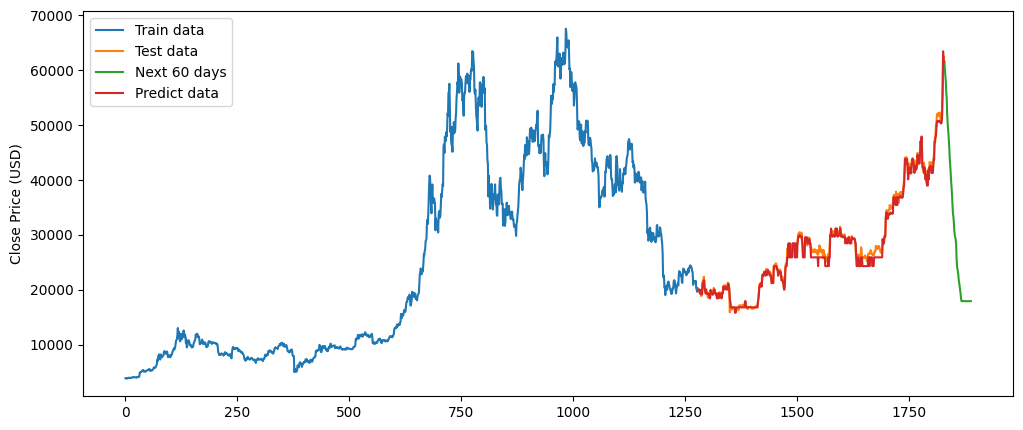

In [329]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

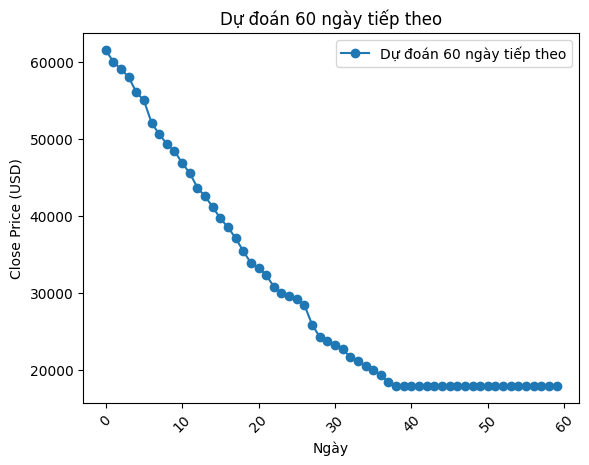

In [330]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [331]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [332]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

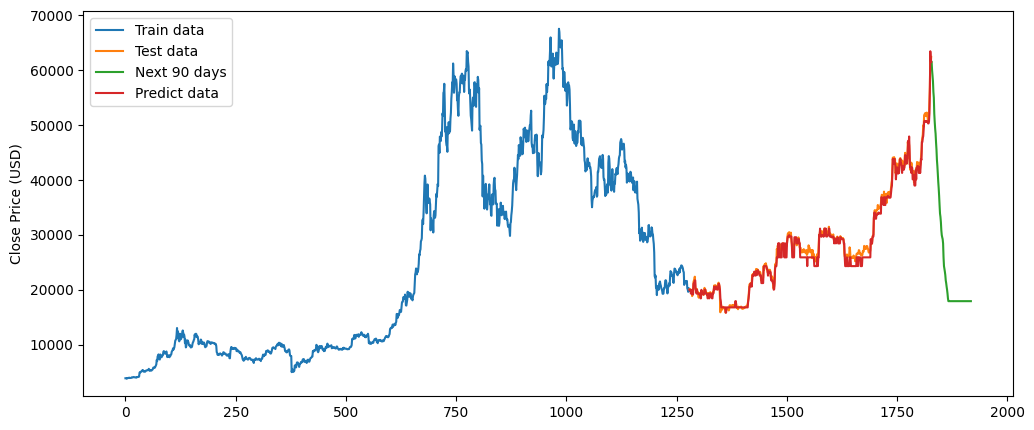

In [333]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

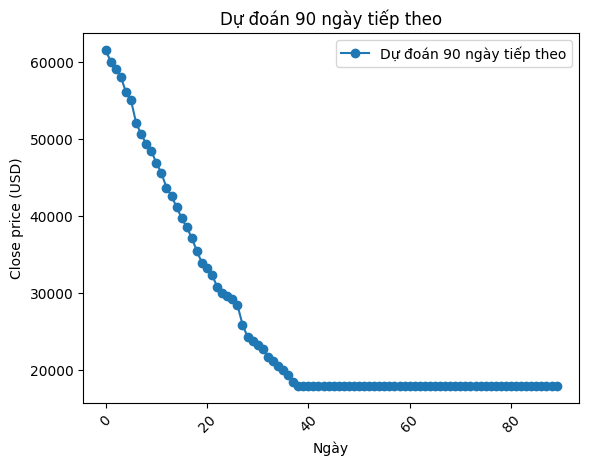

In [334]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ train test 8:2

In [335]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [336]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [337]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.6668429434708214
MSE:  1092682.2952800554
RMSE: 1045.314448039467
R_Square:  0.9833257051196218


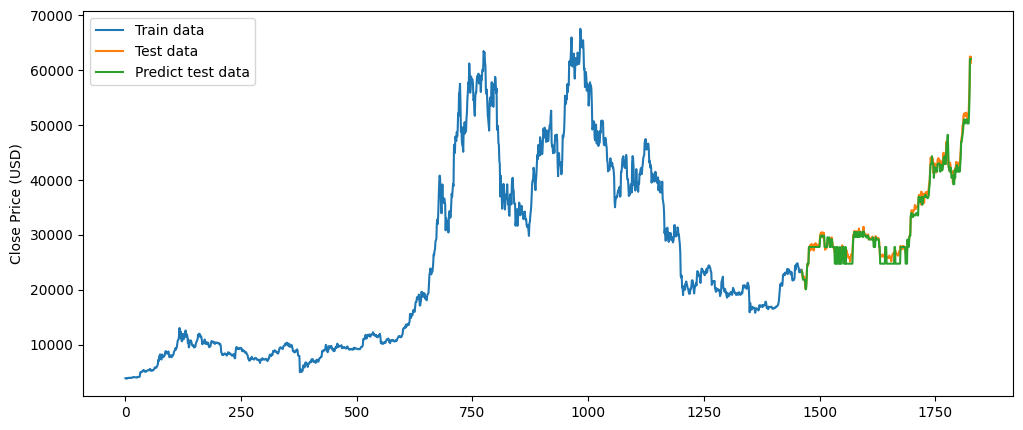

In [338]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [339]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [340]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

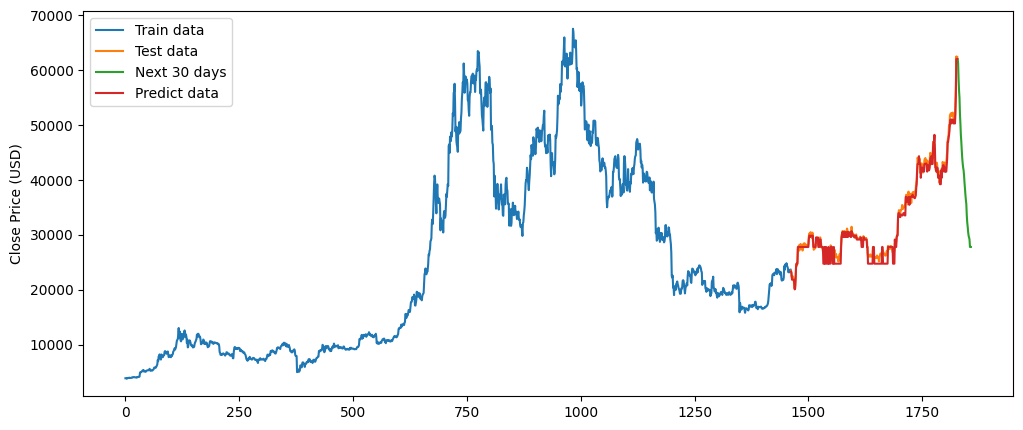

In [341]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

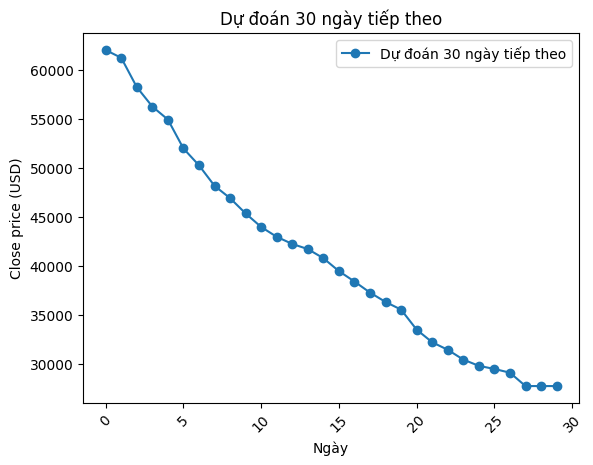

In [342]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [343]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [344]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

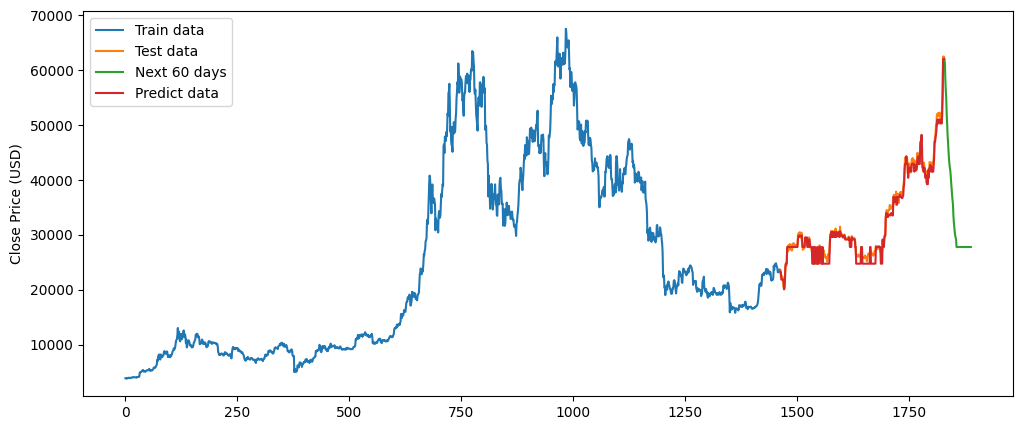

In [345]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

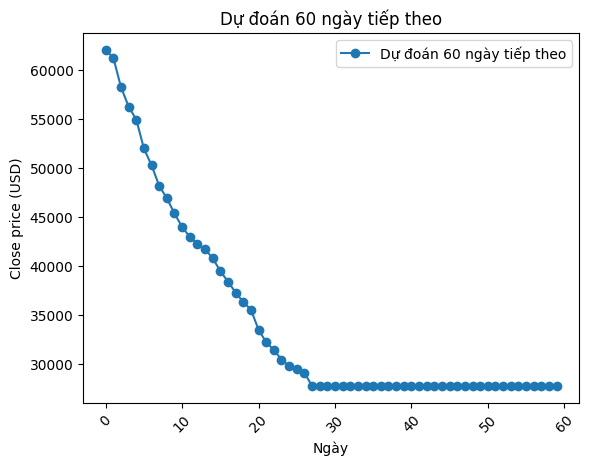

In [346]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [347]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [348]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

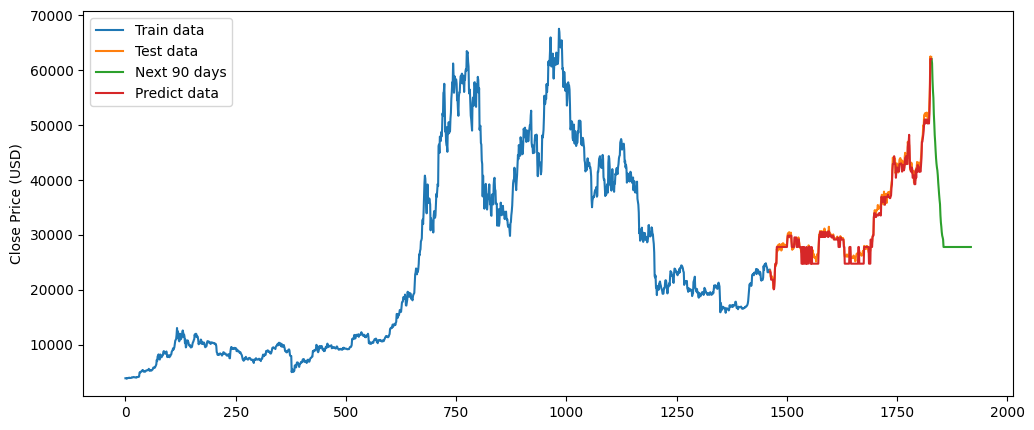

In [349]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

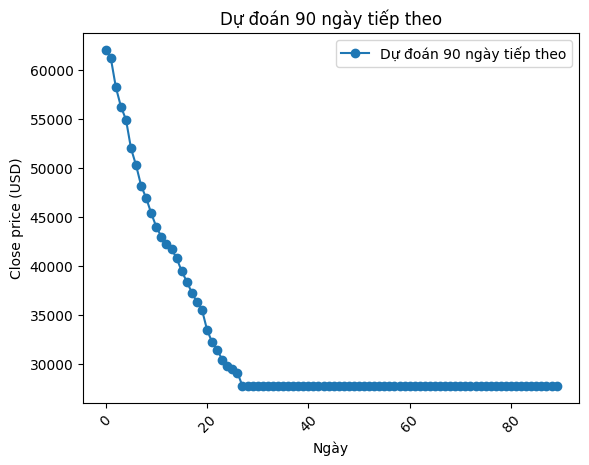

In [350]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ 9:1

In [351]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [352]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [353]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 1.7719487368850397
MSE:  717393.6366409753
RMSE: 846.9909306722093
R_Square:  0.9903335036304333


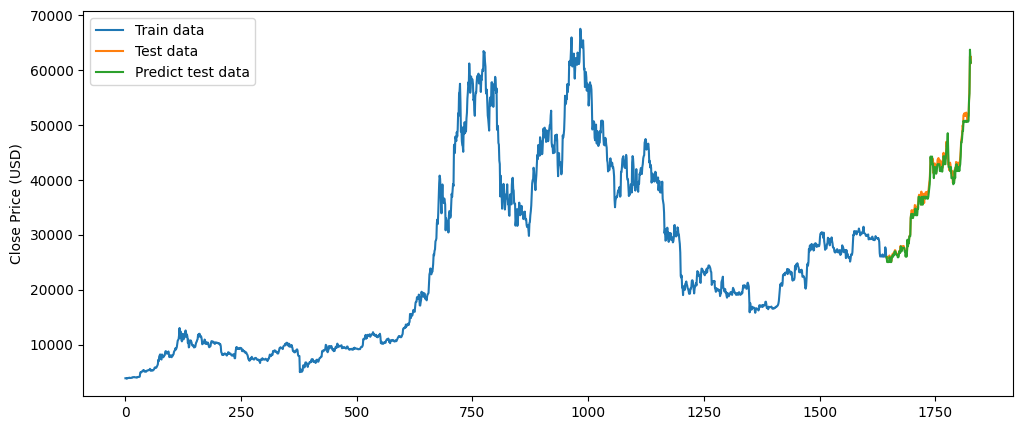

In [354]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [355]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [356]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

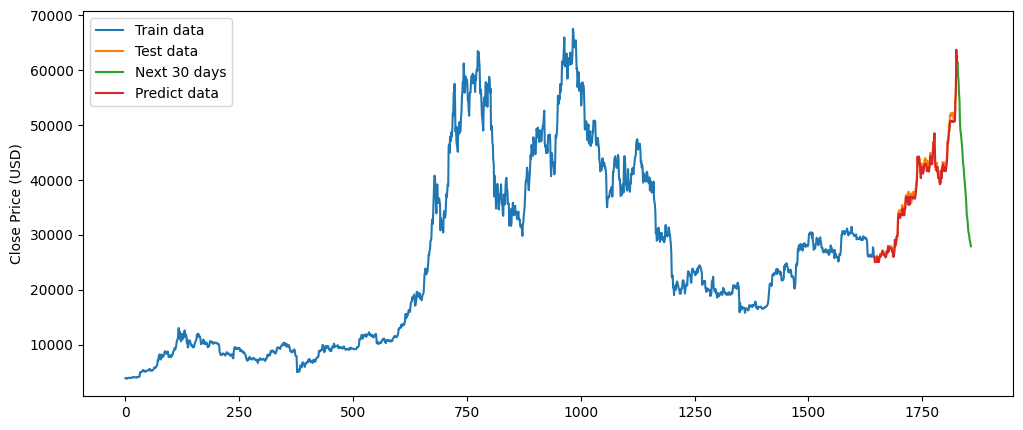

In [357]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30), x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

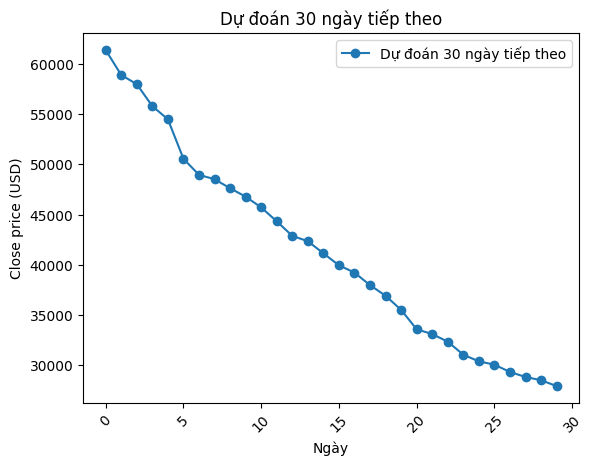

In [358]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [359]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [360]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

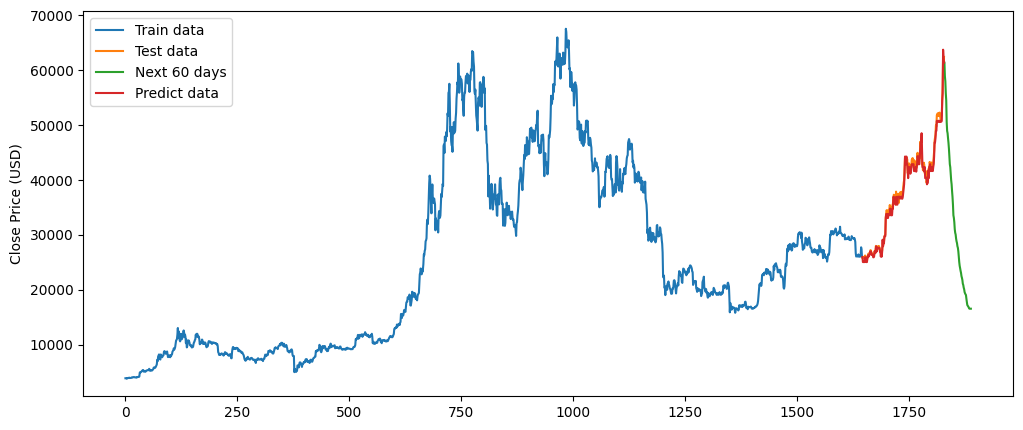

In [361]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

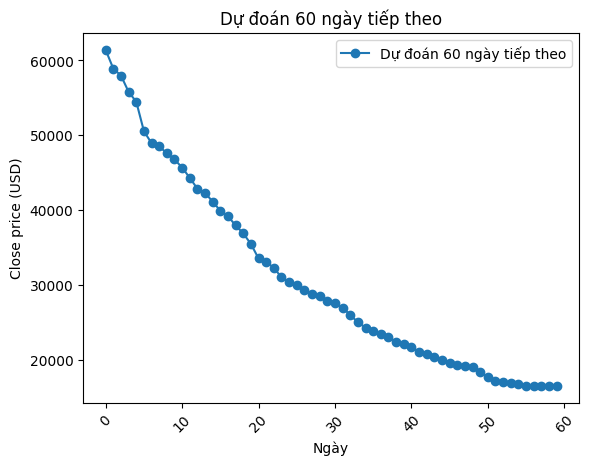

In [362]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [363]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[63155.101563]])

In [364]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

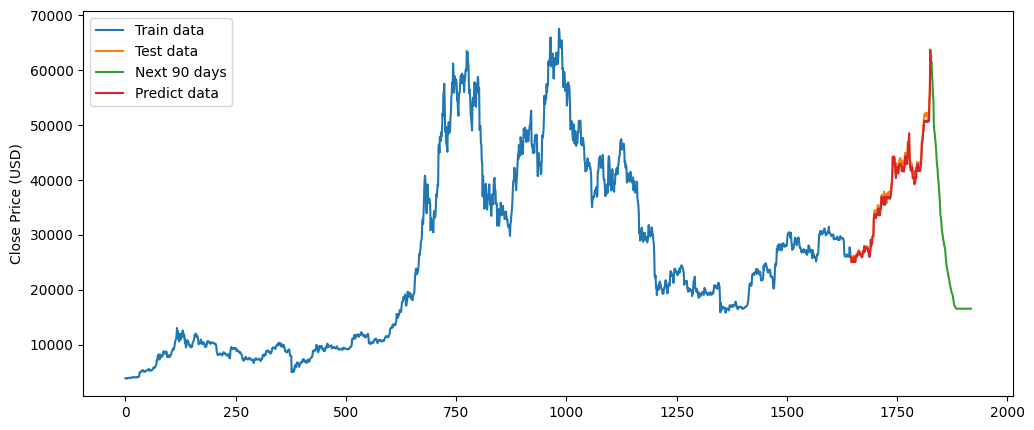

In [365]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

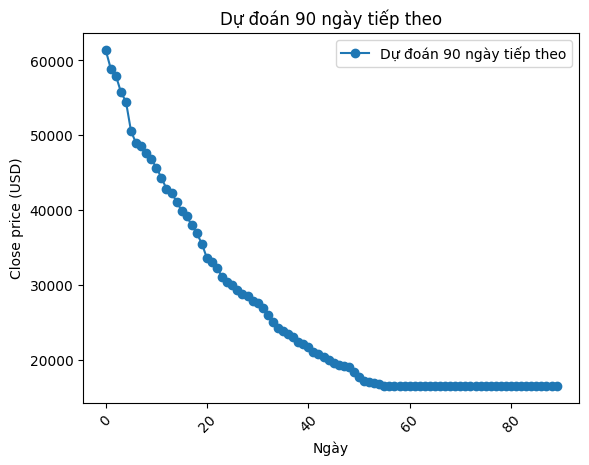

In [366]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()